## Transforming nonlinear data with Kernel PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from ipywidgets import interact, FloatSlider, Dropdown

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.regression import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [2]:
h = .02  # step size in the mesh

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = {'moons': make_moons(n_samples=150, noise=0.075, random_state=0),
            'circles': make_circles(n_samples=150, noise=0.1, factor=0.2, random_state=1),
            'linear': linearly_separable} 

In [3]:
def kpca_transformed(dataset_name, kernel_name, gamma):
  kpca = KernelPCA(n_components=2, kernel=kernel_name, gamma=gamma)

  X, y = datasets[dataset_name]
  X_transformed = kpca.fit_transform(X)
  
  return X, X_transformed, y

In [4]:
h = .02  # step size in the mesh

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over datasets
def plot_svm_classification(X, y, C, title):
    svc = LinearSVC(C=C)
    
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #ax = plt.subplot()
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    plt.title(
      '{} \n$C$: {}\n Score \n Train:{}% Test:{}%'
        .format(
          title,
          C,
          round(100 * svc.score(X_train, y_train), 2),
          round(100 * score, 2),
      fontsize=20))
    
def plot_transformed(dataset_name, kernel_name, gamma, C):
  X, X_transformed, y = kpca_transformed(dataset_name, kernel_name, gamma)
  
  X = StandardScaler().fit_transform(X)
  figure = plt.figure(figsize=(18, 16))
  plt.subplot(221)
  plot_svm_classification(X, y, C, title='Original')
  
  plt.subplot(222)
  plot_svm_classification(X_transformed, y, C, title='KPCA with $\gamma$={}'.format(gamma))
  plt.show()

## Kernel PCA transform of moons

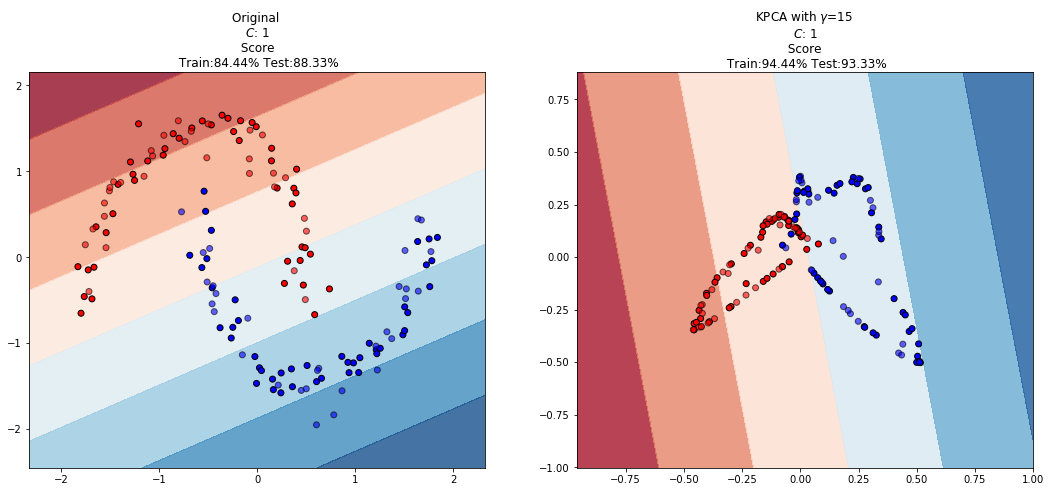

In [5]:
plot_transformed('moons', 'rbf', 15, 1)

## Kernel PCA transform of circles 

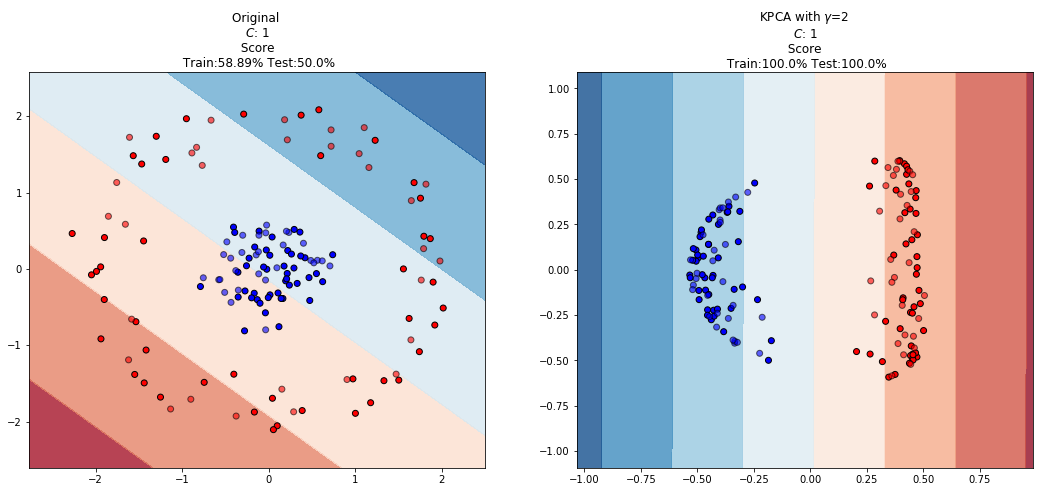

In [6]:
plot_transformed('circles', 'rbf', 2, 1)

### Manipulating  $\gamma$ and $C$ parameters

In [7]:
interact(plot_transformed, 
         dataset_name=Dropdown(options=['circles', 'moons']),
         kernel_name=Dropdown(options=['rbf', 'sigmoid']),
         gamma=FloatSlider(min=0.001, max=25, step=0.001, value=10),
         C=FloatSlider(min=0.001, max=10, step=0.001, value=1))

<function __main__.plot_transformed>